<a href="https://colab.research.google.com/github/Jalajgupta15/Crowd-Management-System/blob/main/Crowd_Management_(L).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
"author@JalajGupta"

'author@JalajGupta'

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import cv2

In [9]:
X = np.load("/content/drive/MyDrive/images.npy")
y = np.load("/content/drive/MyDrive/labels.npy")

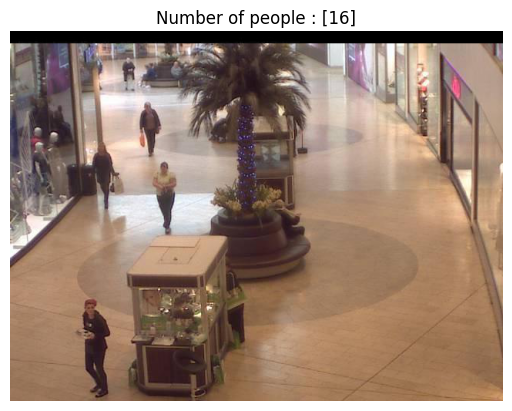

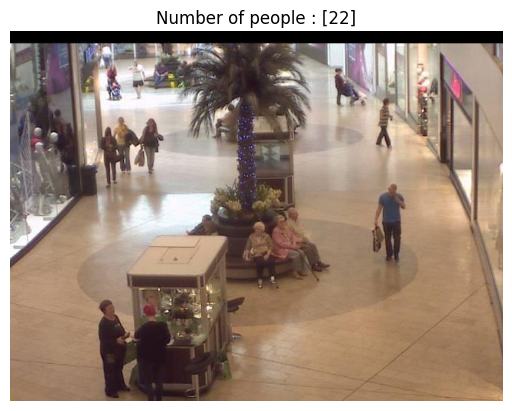

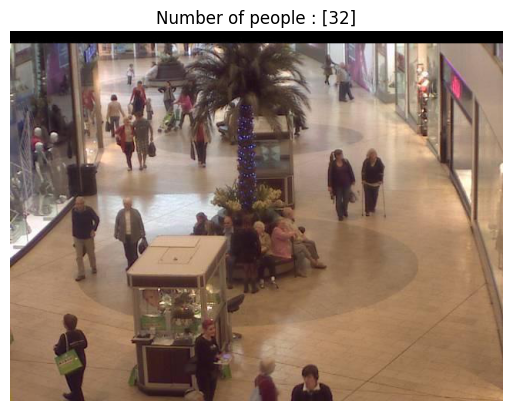

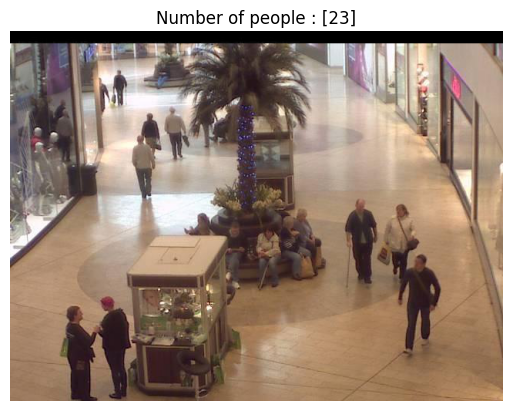

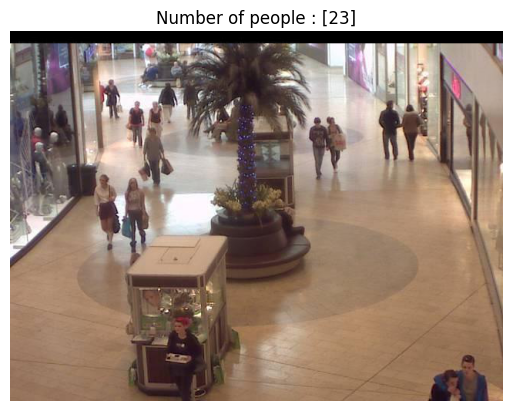

In [10]:
# Generate 5 random numbers within the range
random_numbers = np.random.randint(0, len(X), size=5)

# Display the images corresponding to the random numbers
for number in random_numbers:
    image = X[number]
    plt.imshow(image)
    plt.title(f"Number of people : {y[number]}")
    plt.axis('off')
    plt.show()

In [11]:
thermal_images = []


for image in X:

    thresh1 = cv2.applyColorMap(image,cv2.COLORMAP_JET)
    # Append the thermal image to the list
    thermal_images.append(thresh1)

# Convert the list of thermal images to a NumPy array
thermal_array = np.array(thermal_images)

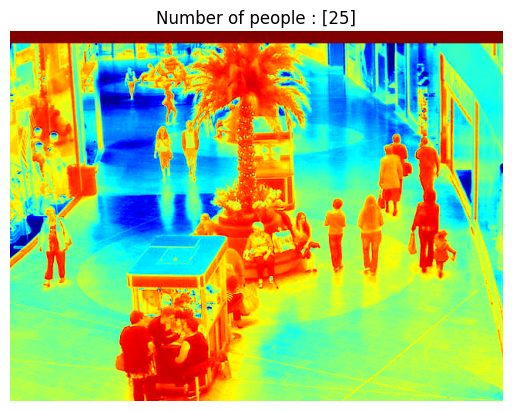

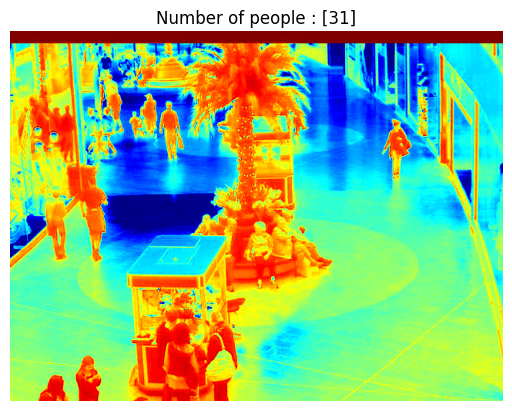

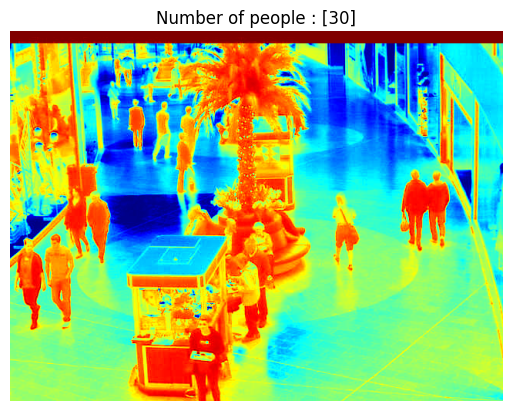

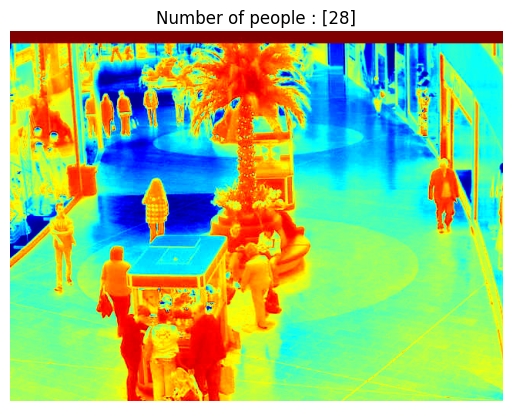

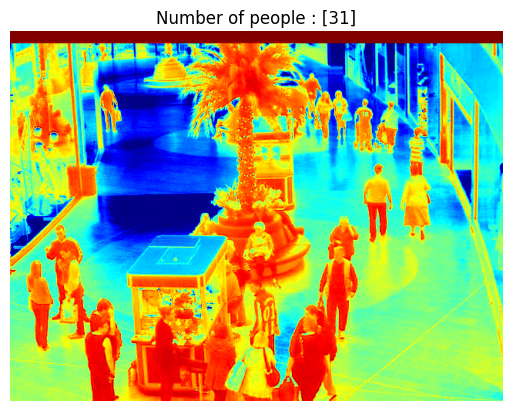

In [12]:
# Generate 5 random numbers within the range
random_numbers = np.random.randint(0, len(thermal_images), size=5)


# Display the images corresponding to the random numbers
for number in random_numbers:
    image = thermal_images[number]
    plt.imshow(image)
    plt.title(f"Number of people : {y[number]}")
    plt.axis('off')
    plt.show()

In [13]:
def histogram_distribution(images):

    # Generate 6 random indices to select random images
    random_indices = np.random.choice(len(images), size=6, replace=False)

    # Create a subplot grid of 2x3
    fig, axs = plt.subplots(2, 3, figsize=(20, 8))

    # Iterate over the random indices and plot colorful histograms
    for i, index in enumerate(random_indices):
        # Calculate the subplot position
        row = i // 3
        col = i % 3

        # Get the image
        image = images[index]

        # Flatten the image array
        flattened_image = image.ravel()

        # Plot the colorful histogram on the corresponding subplot
        n, bins, patches = axs[row, col].hist(flattened_image, bins=256)

        cmap = plt.cm.viridis

        # Normalize the histogram bins to range from 0 to 1
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        bin_width = bins[1] - bins[0]
        normalized_bins = (n - np.min(n)) / (np.max(n) - np.min(n))

        # Assign colors based on the normalized histogram bins
        for c, p in zip(normalized_bins, patches):
            plt.setp(p, 'facecolor', cmap(c))

        axs[row, col].set_title(f'Image {index}')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

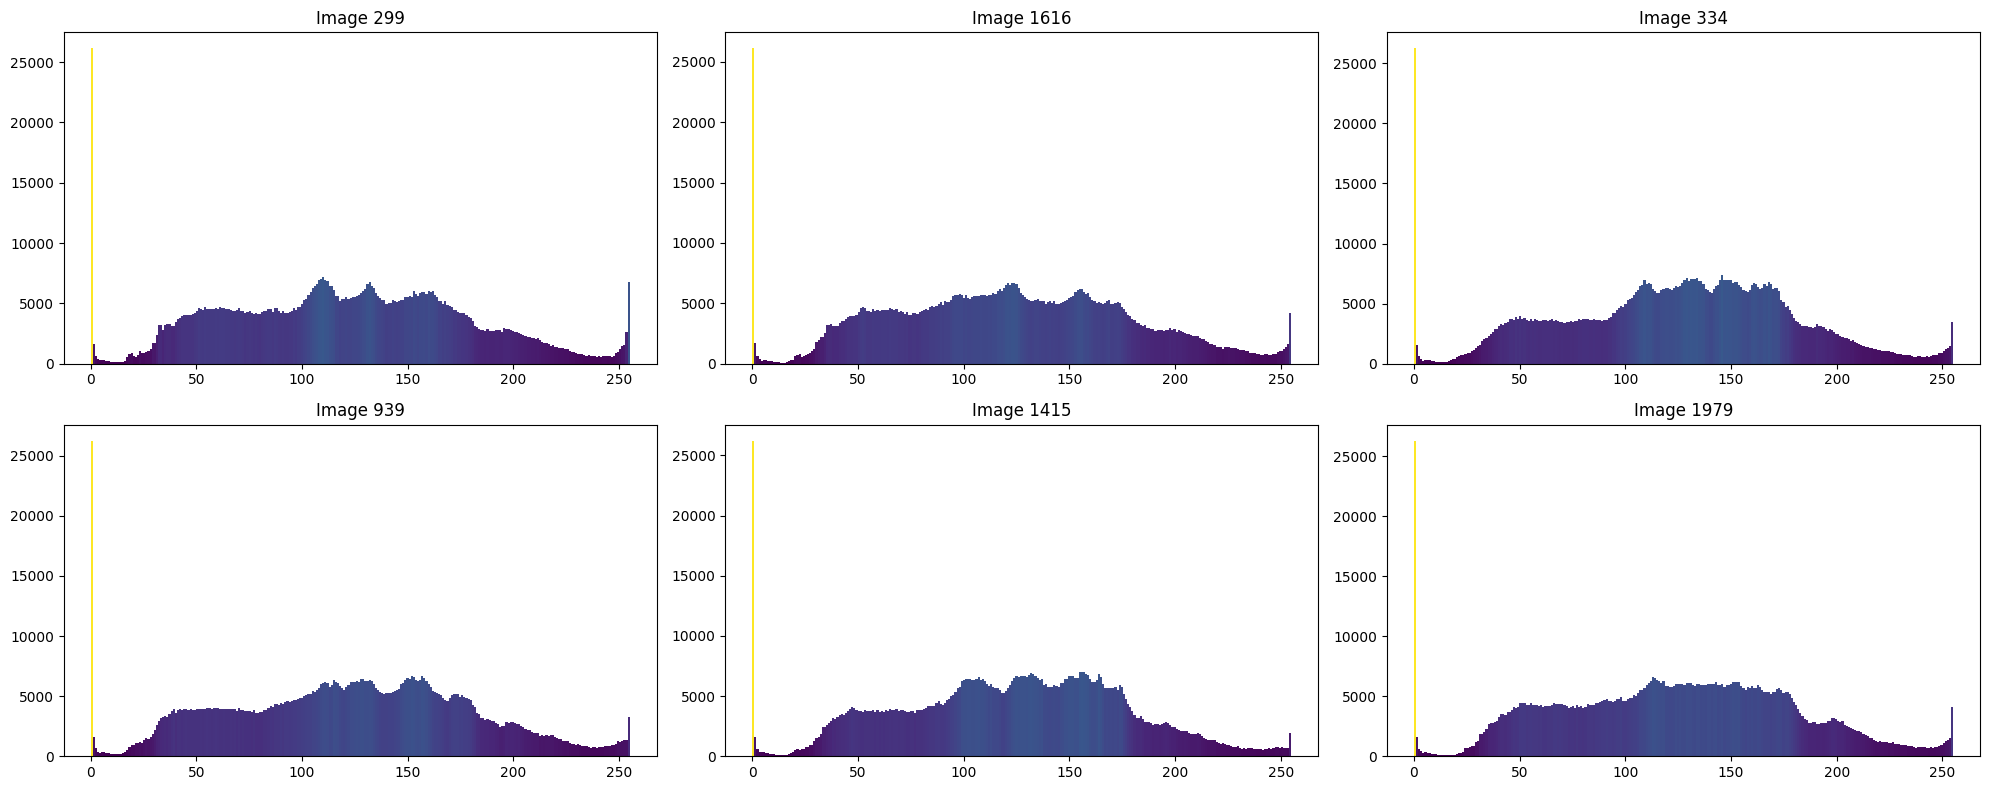

In [14]:
histogram_distribution(X)

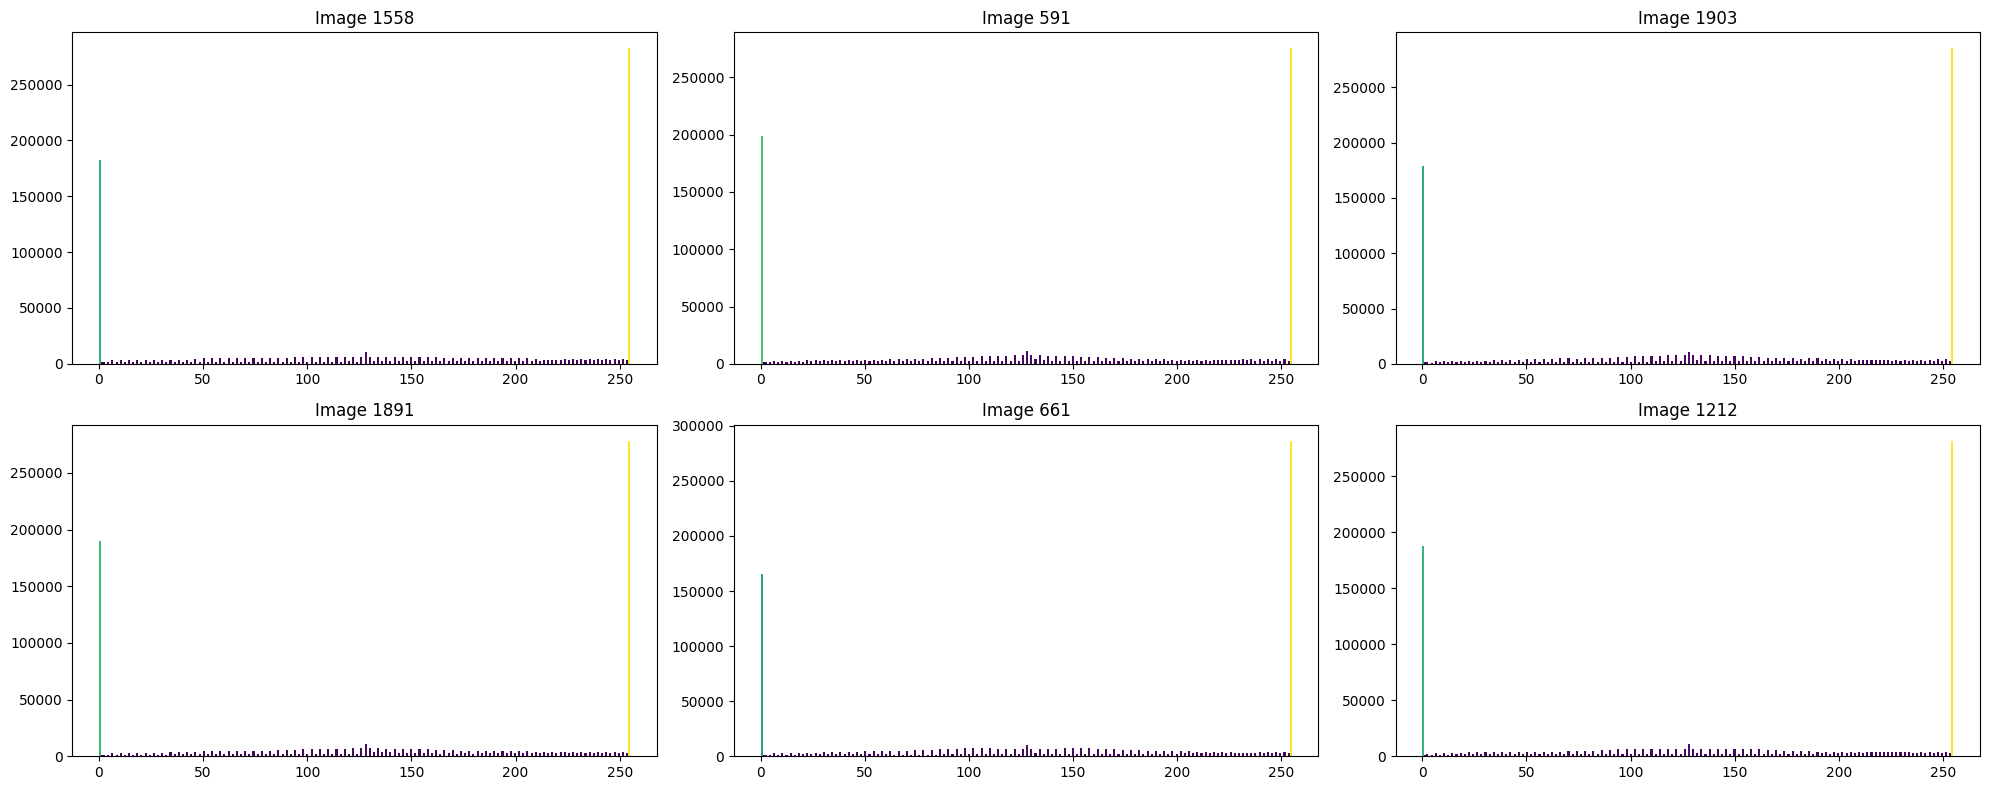

In [15]:
histogram_distribution(thermal_images)

In [16]:
del X

In [17]:
from PIL import Image

# Assuming you have a NumPy array named 'thermal_array' containing the thermal images

# Specify the desired new shape
new_shape = (50, 50)

# Create an empty list to store the resized images
resized_images = []

# Iterate over the images and resize each one
for i in range(len(thermal_array)):
    # Convert the NumPy array to PIL image object
    image = Image.fromarray((thermal_array[i] * 255).astype(np.uint8))

    # Resize the image
    resized_image = image.resize(new_shape, resample=Image.BILINEAR) #bilinear interpolation

    # Convert the resized image back to NumPy array
    resized_array = np.array(resized_image)

    # Append the resized image to the list
    resized_images.append(resized_array)

# Convert the list of resized images to NumPy array
resized_array = np.array(resized_images)

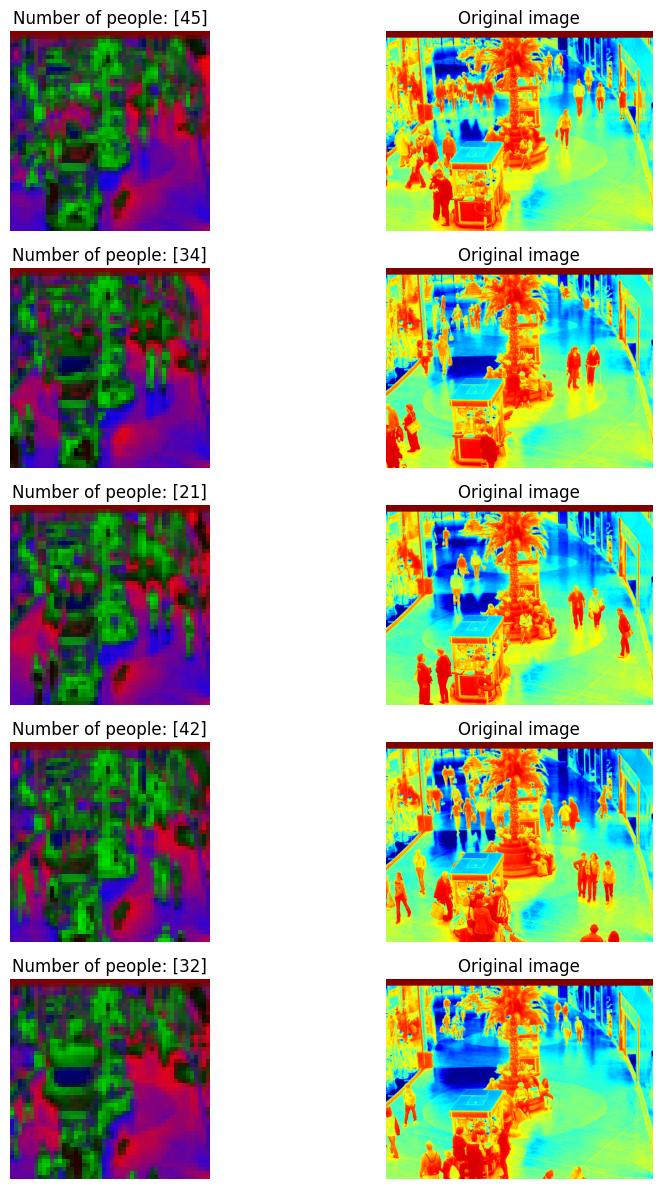

In [18]:
# Generate 5 random numbers within the range
random_numbers = np.random.randint(0, len(resized_array), size=5)

# Create a figure with a 5x2 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))

# Display images from resized_array in the first column
for i, number in enumerate(random_numbers):
    image_resized = resized_array[number]
    axes[i, 0].imshow(image_resized)
    axes[i, 0].set_title(f"Number of people: {y[number]}")
    axes[i, 0].axis('off')

# Display images from X (thermal array) in the second column
for i, number in enumerate(random_numbers):
    image_thermal = thermal_array[number]
    axes[i, 1].imshow(image_thermal)
    axes[i, 1].set_title("Original image")
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [19]:
flattened_x = resized_array.reshape(len(thermal_images), -1)

In [20]:
del thermal_images, thermal_array, resized_array

In [21]:
rescale_x = flattened_x/255

In [22]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rescale_x, y, test_size=0.15, random_state=42)

In [23]:
print(f"X Train shape : {X_train.shape}")
print(f"X Test shape : {X_test.shape}")
print(f"Y Train shape : {y_train.shape}")
print(f"Y test shape : {y_test.shape}")

X Train shape : (1700, 7500)
X Test shape : (300, 7500)
Y Train shape : (1700, 1)
Y test shape : (300, 1)


In [24]:
reg = Ridge(alpha=0.2,max_iter = 300)

reg.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate the metrics for the training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_ev = explained_variance_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_ev = explained_variance_score(y_test, y_test_pred)

# Print the metrics for the training and testing sets
print("Training set metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R-squared: {train_r2:.2f}")
print(f"Explained Variance: {train_ev:.2f}")

print("\n\nTesting set metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R-squared: {test_r2:.2f}")
print(f"Explained Variance: {test_ev:.2f}")

Training set metrics:
MSE: 0.01
RMSE: 0.08
MAE: 0.06
R-squared: 1.00
Explained Variance: 1.00


Testing set metrics:
MSE: 6.37
RMSE: 2.52
MAE: 1.96
R-squared: 0.86
Explained Variance: 0.86


In [25]:
for i in range(0,len(X_test)):
    print(f"Predicted value : {int(reg.predict(X_test[i].reshape(1,-1)))}")
    print(f"Actual Value : {int(y_test[i])}",end = "\n\n")

Predicted value : 35
Actual Value : 30

Predicted value : 34
Actual Value : 34

Predicted value : 40
Actual Value : 45

Predicted value : 39
Actual Value : 42

Predicted value : 28
Actual Value : 25

Predicted value : 31
Actual Value : 33

Predicted value : 31
Actual Value : 31

Predicted value : 42
Actual Value : 44

Predicted value : 29
Actual Value : 27

Predicted value : 39
Actual Value : 36

Predicted value : 27
Actual Value : 23

Predicted value : 32
Actual Value : 28

Predicted value : 29
Actual Value : 28

Predicted value : 20
Actual Value : 20

Predicted value : 28
Actual Value : 30

Predicted value : 35
Actual Value : 33

Predicted value : 33
Actual Value : 34

Predicted value : 33
Actual Value : 34

Predicted value : 32
Actual Value : 40

Predicted value : 42
Actual Value : 43

Predicted value : 23
Actual Value : 22

Predicted value : 31
Actual Value : 32

Predicted value : 31
Actual Value : 29

Predicted value : 30
Actual Value : 30

Predicted value : 28
Actual Value : 29



<ipython-input-25-2d9c657e0142>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted value : {int(reg.predict(X_test[i].reshape(1,-1)))}")
<ipython-input-25-2d9c657e0142>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual Value : {int(y_test[i])}",end = "\n\n")
<ipython-input-25-2d9c657e0142>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted value : {int(reg.predict(X_test[i].reshape(1,-1)))}")
<ipython-input-25-2d9c657e0



Predicted value : 20
Actual Value : 24

Predicted value : 26
Actual Value : 29

Predicted value : 25
Actual Value : 27

Predicted value : 29
Actual Value : 30

Predicted value : 35
Actual Value : 35

Predicted value : 29
Actual Value : 27

Predicted value : 39
Actual Value : 39

Predicted value : 23
Actual Value : 25

Predicted value : 29
Actual Value : 30

Predicted value : 23
Actual Value : 25

Predicted value : 27
Actual Value : 25

Predicted value : 34
Actual Value : 33

Predicted value : 24
Actual Value : 23

Predicted value : 13
Actual Value : 17

Predicted value : 23
Actual Value : 24

Predicted value : 34
Actual Value : 34

Predicted value : 36
Actual Value : 34

Predicted value : 27
Actual Value : 29

Predicted value : 33
Actual Value : 33

Predicted value : 25
Actual Value : 28

Predicted value : 45
Actual Value : 46

Predicted value : 29
Actual Value : 31

Predicted value : 38
Actual Value : 41

Predicted value : 24
Actual Value : 23

Predicted value : 29
Actual Value : 29

<ipython-input-25-2d9c657e0142>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual Value : {int(y_test[i])}",end = "\n\n")
<ipython-input-25-2d9c657e0142>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted value : {int(reg.predict(X_test[i].reshape(1,-1)))}")
<ipython-input-25-2d9c657e0142>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual Value : {int(y_test[i])}",end = "\n\n")
<ipython-input-25-2d9c657e0142>:2: Deprecati


Actual Value : 33

Predicted value : 32
Actual Value : 29

Predicted value : 39
Actual Value : 38

Predicted value : 40
Actual Value : 47

Predicted value : 27
Actual Value : 25

Predicted value : 39
Actual Value : 41

Predicted value : 18
Actual Value : 22

Predicted value : 44
Actual Value : 43

Predicted value : 33
Actual Value : 35

Predicted value : 37
Actual Value : 36



<ipython-input-25-2d9c657e0142>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Actual Value : {int(y_test[i])}",end = "\n\n")
